# Exploratory Data Analysis

In [1]:
# Author information
__author__ = "Troy Reynolds"
__email__ = "Troy.Lloyd.Reynolds@gmail.com"

In [2]:
# libraries
import pandas as pd
import sys

# Extend the directory to get created functions
sys.path.insert(0, "./function_scripts")

# import helper functions
from data_import_functions import get_data
from EDA_helper_functions import num_eda, target_num_eda, cat_eda, interaction_plots, corr_heat_map

## Load Data 

As discussed in the previous notebook, we will remove the observations with salaries equal to 0.

In [3]:
data = get_data("train", key = "jobId", target_variable = "salary", remove_zeros = True)
display(data)

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


## EDA

#### Numerical Variables
<u>Numerical Features</u>:
* The numerical features that are being analyzed are "yearExperience", and "milesFromMetropolis". From the line graph below, the both numerical variables are correlated with the target variable, but in opposite directions. Furthermore, the distribution seem to be uniform based on the histogram and boxplots

<u>Taret Variable</u>:
* The "salary" variable seems to be slightly right tailed. However, the distribution indicated by the histogram seems to approximate a normal distribution. The removal of the potential outliers could affect the model predictive power towards job listings with higher salary ranges. For that reason, we will keep the observations.

Saving figure num_eda_plot_yearsExperience
Saving figure num_eda_plot_milesFromMetropolis


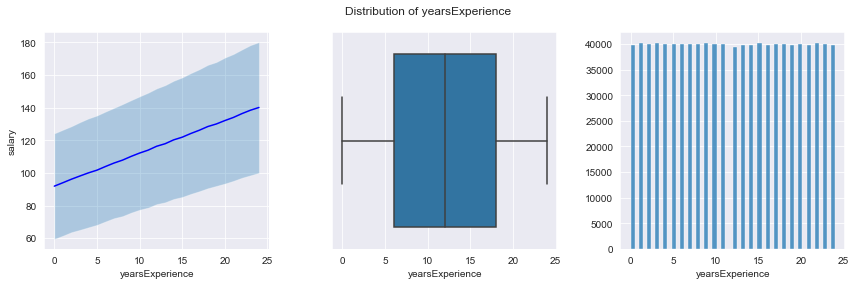

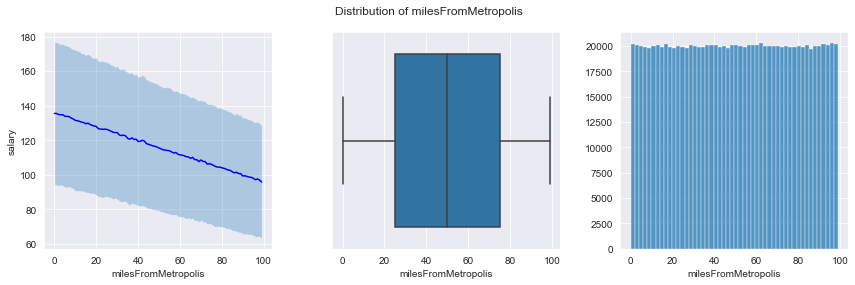

In [4]:
# Numerical Features
num_eda(data, "salary")

Saving figure target_eda_plot_salary


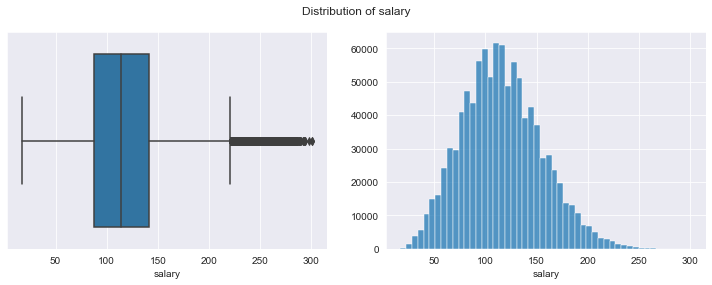

In [5]:
# Target Variable
target_num_eda(data = data, target_col = "salary")

#### Categorical Features
<u>Histograms:</u>
* Job Type and Industry seems to have a balanced distribution between levels. Degree seems to have a slight imbalanced distribution where high school or no degree have more observations. Similarly, Major has a very unbalanced distribution with no major having most of the obersvations which comes from the slight imbalance from the Degree feature.

<u>Box Plots:</u>
* There is a lot of variability in Job Type and Industry variable suggesting that they have importance in predicting salary.
* The Degree variable seems to have a split between higher eduation and no higher education. This suggests that this feature transformation could improve the model.
* There is slight variation between majors and large drop off in mean salary for job listings that do not require a major which agrees with the degree variable.

Saving figure cat_eda_plot_jobType
Saving figure cat_eda_plot_degree
Saving figure cat_eda_plot_major
Saving figure cat_eda_plot_industry


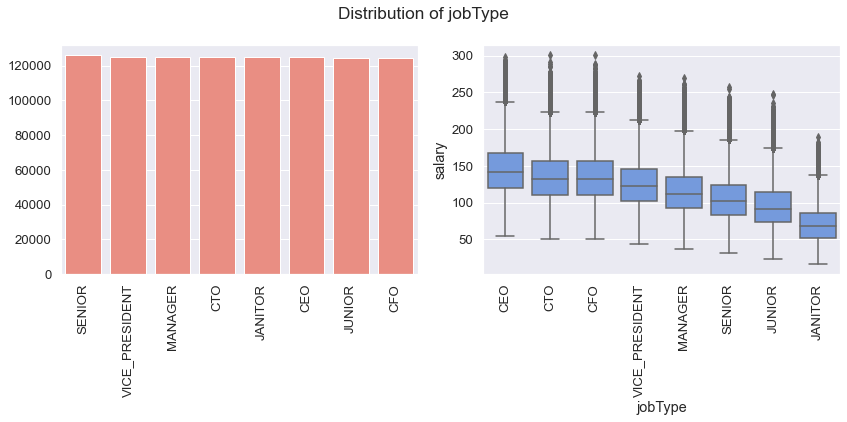

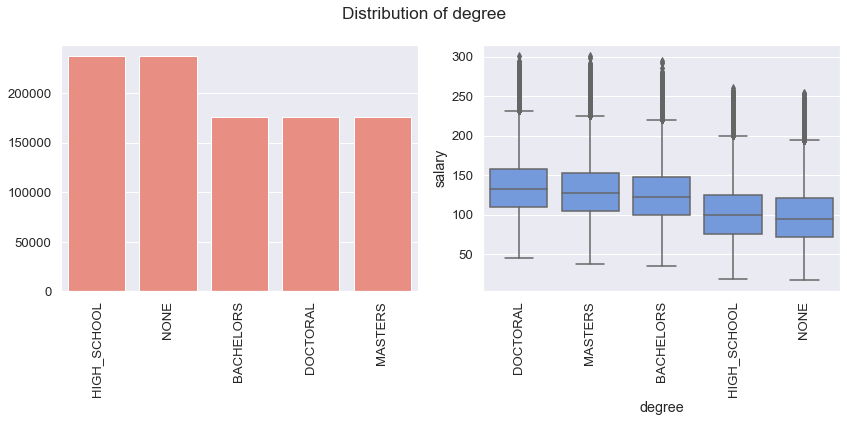

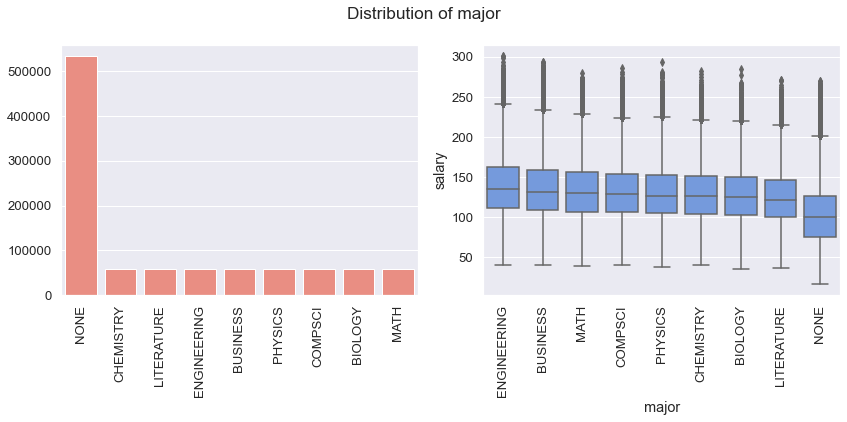

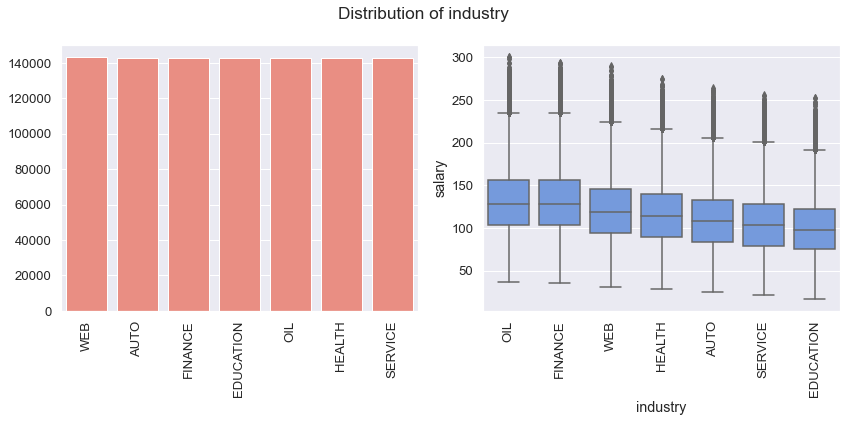

In [6]:
cat_eda(data = data, target_col = "salary")

#### Interactions Between Prediction Features
Only the AB interaction plot between major and industry suggests that there is significant interaction between the variables. This suggests that including an interaction variable for linear models could improve the error metric. Additionally, a full polynomial transformation of degree 2 will be considered.


*************************** Categorical vs Numerical ***************************

Saving figure cat_num_interaction_plots_jobType


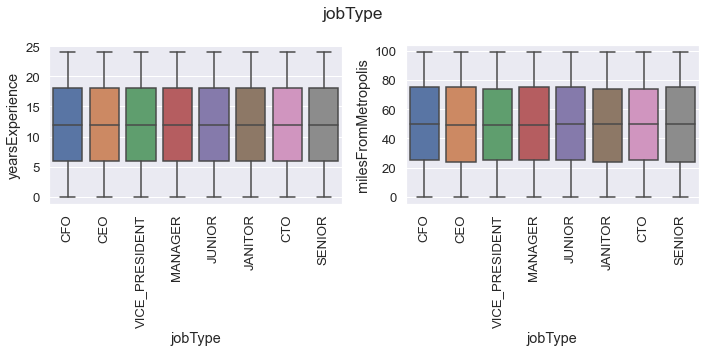

Saving figure cat_num_interaction_plots_degree


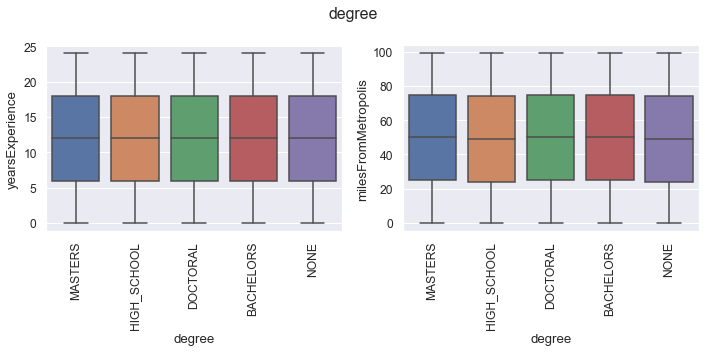

Saving figure cat_num_interaction_plots_major


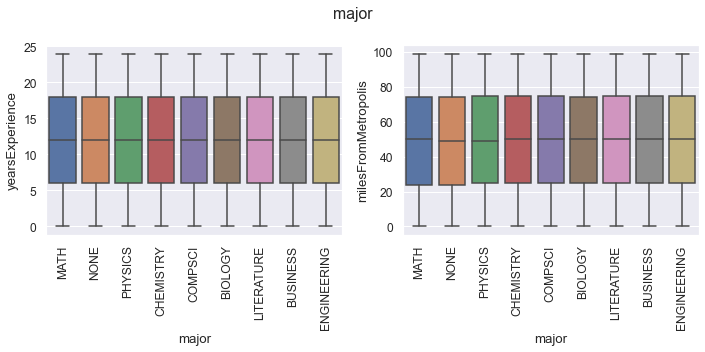

Saving figure cat_num_interaction_plots_industry


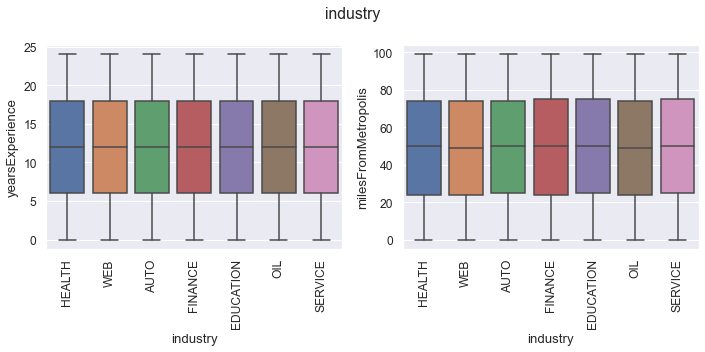


************************** Categorical vs Categorical **************************

Saving figure cat_cat_interaction_plot_jobType_degree


<Figure size 432x288 with 0 Axes>

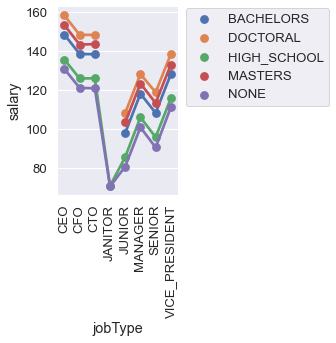

Saving figure cat_cat_interaction_plot_jobType_major


<Figure size 432x288 with 0 Axes>

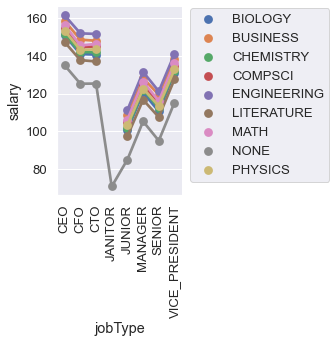

Saving figure cat_cat_interaction_plot_jobType_industry


<Figure size 432x288 with 0 Axes>

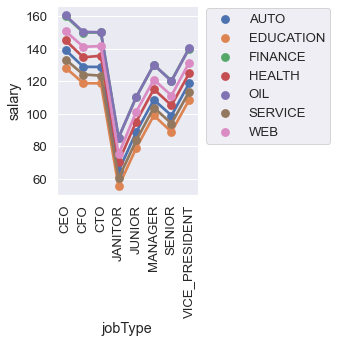

Saving figure cat_cat_interaction_plot_degree_major


<Figure size 432x288 with 0 Axes>

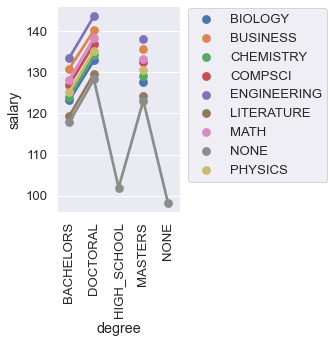

Saving figure cat_cat_interaction_plot_degree_industry


<Figure size 432x288 with 0 Axes>

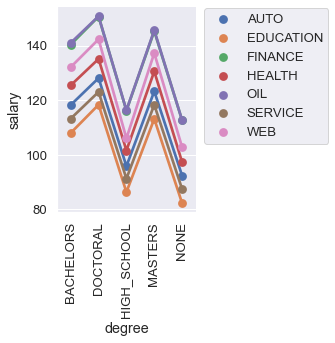

Saving figure cat_cat_interaction_plot_major_industry


<Figure size 432x288 with 0 Axes>

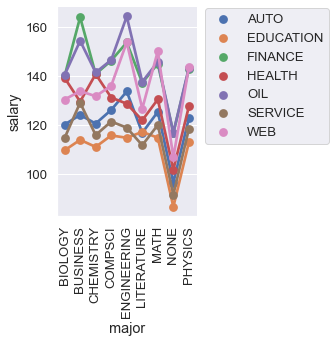

In [7]:
interaction_plots(data = data)

#### Correlation Heatmap
* Each feature is correlated with the target variable and suggests that each feature is influencial in the model. 
* There is multicolinearity amongst the major, degree, and potentially jobType.

Saving figure corr_heat_map


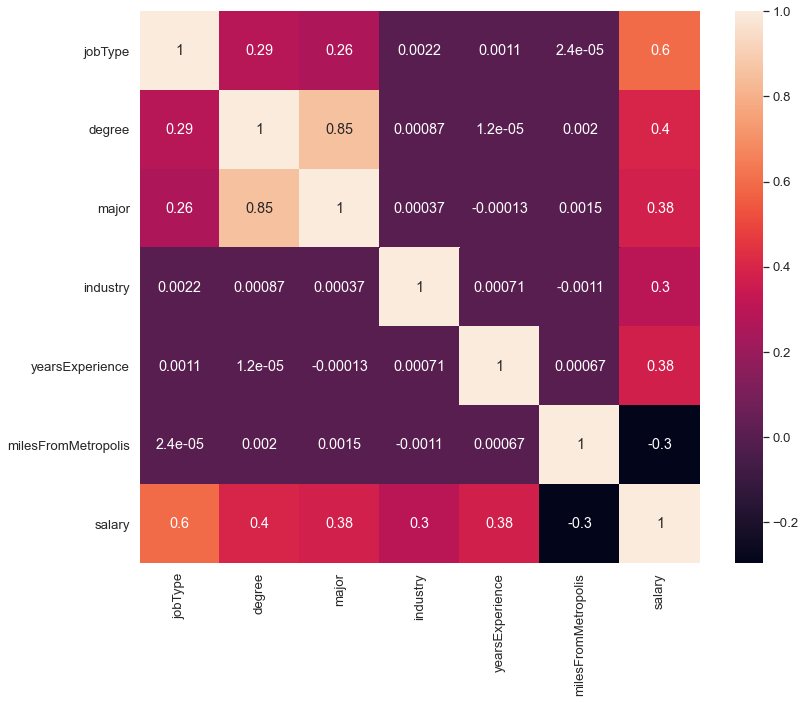

In [8]:
corr_heat_map(data = data, target_col = "salary")